# Naive Bayes

Naive Bayes is a simple yet effective machine learning algorithm commonly used for classification tasks. It's based on Bayes' theorem, which describes the probability of an event occurring given prior knowledge of conditions related to the event. The "naive" part of its name comes from the assumption of independence among the features in the dataset, meaning that the presence of one particular feature does not affect the presence of another

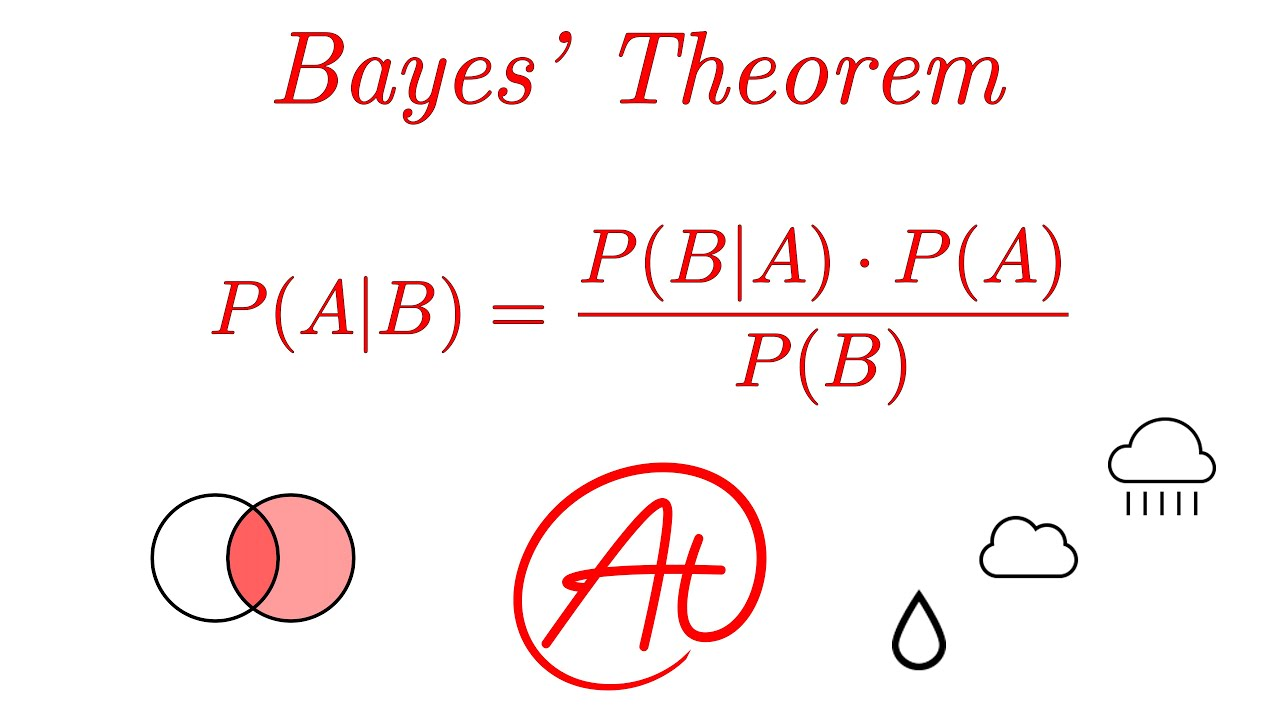

In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline


In [2]:
df = pd.read_csv('play_tennis.csv')
df.columns

Index(['outlook', 'temp', 'humidity', 'wind', 'play'], dtype='object')

In [3]:
df

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [4]:
df['wind']

0       Weak
1     Strong
2       Weak
3       Weak
4       Weak
5     Strong
6     Strong
7       Weak
8       Weak
9       Weak
10    Strong
11    Strong
12      Weak
13    Strong
Name: wind, dtype: object

In [5]:
transformer = ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(drop='first',sparse=False),['outlook']),
    ('trf2',OrdinalEncoder(categories=[['Cool','Mild','Hot'],['Normal','High'],['Weak','Strong'],['Yes','No']]),['temp', 'humidity', 'wind','play'])
],remainder='passthrough')

In [6]:
transform_data =transformer.fit_transform(df)

C:\Users\Vishal\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
columns = ['temp', 'humidity', 'wind'] + list(transformer.named_transformers_['trf1'].get_feature_names_out()) + ['play']


In [8]:
df = pd.DataFrame(transform_data, columns=columns)

In [9]:
df

,temp,humidity,wind,outlook_Rain,outlook_Sunny,play
0,0.0,1.0,2.0,1.0,0.0,1.0
1,0.0,1.0,2.0,1.0,1.0,1.0
2,0.0,0.0,2.0,1.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,1.0,1.0
6,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,1.0,1.0,1.0,0.0,1.0
8,0.0,1.0,0.0,0.0,0.0,0.0
9,1.0,0.0,1.0,0.0,0.0,0.0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [11]:
X = df.drop(columns=['play'])
y = df['play']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3333333333333333


In [15]:
X_test.iloc[[1]]

,temp,humidity,wind,outlook_Rain,outlook_Sunny
11,0.0,0.0,1.0,1.0,1.0


In [16]:
nb_classifier.predict(X_test.iloc[[1]])

array([1.])

# When to use Naive Bayes

Text Classification: Naive Bayes works well with text data, such as spam filtering, sentiment analysis, and document categorization. It's particularly effective when the feature space (vocabulary) is large.

Simple and Fast Implementation: Naive Bayes is computationally efficient and scales well with the size of the dataset. It's suitable for large datasets with high dimensionality.

Small Training Set: It can perform well even with a small training dataset. This makes it useful when you have limited labeled data available.

Independence Assumption Holds: Naive Bayes assumes that features are conditionally independent given the class label. It can still perform reasonably well even if this assumption is not entirely true, as long as the violation is not severe.

Baseline Model: Naive Bayes can serve as a baseline model for comparison with more complex algorithms. It provides a simple benchmark to evaluate the performance of more sophisticated methods.

# When not to use Naive Bayes

Dependent Features: If features are strongly dependent on each other, violating the independence assumption, Naive Bayes may perform poorly. In such cases, more sophisticated models like decision trees or neural networks might be more appropriate.

Continuous Features: While Naive Bayes can handle continuous features, it assumes a Gaussian distribution for each class. If the distribution of features is significantly non-Gaussian, Naive Bayes may not perform well.

Sensitive to Feature Quality: Naive Bayes can be sensitive to irrelevant or noisy features. Preprocessing and feature selection techniques should be employed to ensure the quality of input features.

Need for Probabilistic Outputs: Naive Bayes provides class probabilities as outputs, which can be useful in many scenarios. However, if you need more nuanced probability estimates or calibrated probabilities, other algorithms like logistic regression or gradient boosting might be more appropriate.

Complex Relationships: If the relationships between features and the target variable are complex and nonlinear, Naive Bayes may not capture these relationships effectively. In such cases, ensemble methods or deep learning techniques might be more suitable.